In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("/mnt/sda3/Placements/Internship-Dhyanahita/AIandML/Python Jupyter/titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# Creating a new column in the DataSet by adding SibSp column and Parch Column
df['Family']= df['Parch']+df['SibSp']
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Family  
0        0         A/5 21171   7.2500   NaN        S       1  
1        0          PC 17599  71.2833   C85        C       1  
2        0  STON/O2. 3101282   7.9250   NaN        S       0  
3        0            113803  53.1000  C123        S       1  
4        0            373450   8.0500   NaN        S       0  
..     ...               ...      ...   ...      ...     ...  
886      0            211536  13.0000   NaN        S       0  
887      0            112053  30.0000   B42        S       0  
888      2        W./C. 6607  23.4500   NaN        S       3  
889      0            111369  30.0000  C148        C       0  
890      0            370376   7.7500   NaN        Q       0  

[891 rows x 13 columns]

In [3]:
#Ticket--> As this is a random number it can be skipped

In [4]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [5]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [6]:
#Based on the categories we will analyze which category people were more likely to survive
## low, Mid, mid-high, high
df['FareCategory']=pd.cut(df.Fare,bins=[0.0000,7.9104,14.4542,31.0000,512.3292],
                           labels=['Low', 'Mid', 'Mid-High', 'High'])
df[['Fare','FareCategory']]

Fare FareCategory
0     7.2500          Low
1    71.2833         High
2     7.9250          Mid
3    53.1000         High
4     8.0500          Mid
..       ...          ...
886  13.0000          Mid
887  30.0000     Mid-High
888  23.4500     Mid-High
889  30.0000     Mid-High
890   7.7500          Low

[891 rows x 2 columns]

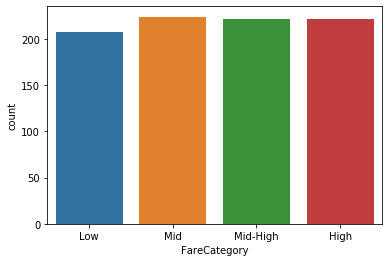

In [7]:
##Visualize the FareCategory
sns.countplot(df.FareCategory)

Text(0.5, 1.0, 'Survival according to FareCategory')

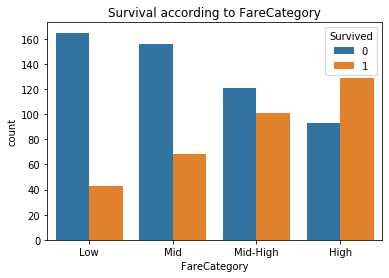

In [8]:
#to get the Survived and Deceased seperately
sns.countplot(df.FareCategory,hue=df.Survived).set_title('Survival according to FareCategory')

##### Observations:
we can observe that the survival count is HIGH in the the FareCategory which is HIGH(around 60% survived)<br>
and, the passengers who paid less fare, we're clearly left to DIE(around 60% dead).<br>
And, as we can observe, the Survival rate increased with the increasse in the Fare price, and, so did the Deceased rate decrease.

In [9]:
#embarked : port--> from which port did the passenger board
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

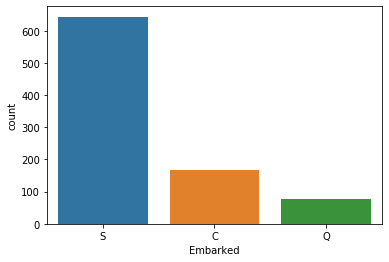

In [10]:
## Visualizing the Port Column
sns.countplot(df.Embarked)

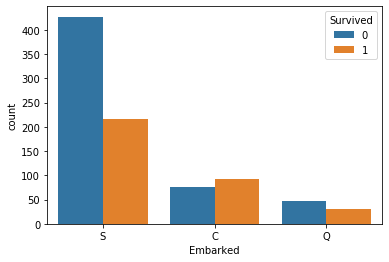

In [11]:
sns.countplot(df.Embarked,hue=df.Survived)

##### Observations:
S ---> Of the total 644 people around 225 survived and around 400 deceased<br>
C ---> of the total 168 people around 75 are deceased and around 90 Survived<br>
Q ---> of the total 77 people around 50 were deceased and around 25 Survived.

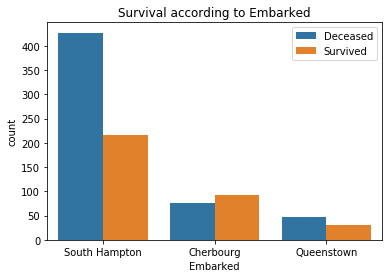

In [12]:
#Setting up labels:
p=sns.countplot(df.Embarked,hue=df.Survived)
p.set_xticklabels(['South Hampton','Cherbourg','Queenstown'])
p.set_title('Survival according to Embarked')
p.legend(labels=['Deceased','Survived'])

In [13]:
##Imputing with Missing Values:
df.isnull().mean().sort_values(ascending=False)

Cabin           0.771044
Age             0.198653
FareCategory    0.016835
Embarked        0.002245
Family          0.000000
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [14]:
## Cabin--> 77% Missing Values, we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)
df.Cabin.isnull().sum()

0

In [15]:
##Imputing the missing Values in Age Column with the Median of the Column
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [16]:
##Imputing the Embarked Column: [since it is a ctegorical column fill the missing values with mode]
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [17]:
##Imputing the FareCategory Column:
df.FareCategory.fillna(df.FareCategory.mode()[0],inplace=True)
df.FareCategory.isnull().sum()

0

In [18]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head(7)

Age Age-Range
0  22.0  (20, 30]
1  38.0  (30, 40]
2  26.0  (20, 30]
3  35.0  (30, 40]
4  35.0  (30, 40]
5  28.0  (20, 30]
6  54.0  (40, 60]

## Encoding Of Categorical Variables:

In [19]:
dummy_set=pd.get_dummies(df.FareCategory,drop_first=True) #n columns, n-1 dummy column must only be included
df1=pd.concat([df,dummy_set],axis=1) #to add the dummy_set to df
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family FareCategory  \
0      0         A/5 21171   7.2500    NA        S       1          Low   
1      0          PC 17599  71.2833   C85        C       1         High   
2      0  STON/O2. 3101282   7.9250    NA        S       0          Mid   
3      0            113803  53.1000  C123        S       1         High   
4      0            373450   8.0500    NA        S       0          Mid   

  Age-Range  Mid  Mid-High  High  
0  (20, 30]    0         0     0  
1  (30, 40]    0         0     1  
2  (20, 30]    1         0     0  
3  (30, 40]    0         0     1  
4  (30, 40]    1         0     0

In [20]:
#do all the above in one step
df= pd.concat([df,pd.get_dummies(df.FareCategory,prefix='FC',drop_first=True),
              pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
               pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
               pd.get_dummies(df['Age-Range'],prefix='AgeRange',drop_first=True)],axis=1)
df.head(7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare  ... Cabin_G6 Cabin_NA  Cabin_T Emb_Q  \
0      0         A/5 21171   7.2500  ...        0        1        0     0   
1      0          PC 17599  71.2833  ...        0        0        0     0   
2      0  STON/O2. 3101282   7.9250  ...        0        1        0     0   
3      0            113803  53.1000  ...        0        0        0     0   
4      0            373450   8.0500  ...        0        1        0     0   
5      0            330877   8.4583  ...        0        1        0     1   
6      0             17463  51.8625  ...        0        0        0     0   

  Emb_S  AgeRange_(10, 20]  AgeRange_(20, 30]  AgeRange_(30, 40]  \
0     1                  0                  1                  0   
1     0                  0                  0                  1   
2     1                  0                  1                  0   
3     1                  0                  0                  1   
4     1                  0                  0                  1   
5     0                  0                  1                  0   
6     1                  0                  0                  0   

   AgeRange_(40, 60]  AgeRange_(60, 80]  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  
5                  0                  0  
6                  1                  0  

[7 rows x 172 columns]

#LabelEncoder --> creates encodings like 0,1,2,3....so on for each unique category
#OneHotEncoder --> creates encodings like dummies

In [21]:
#encoding Sex Column with Label encoder as it ahas only 2 columns
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head(7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   
5                                   Moran, Mr. James    1  28.0      0      0   
6                            McCarthy, Mr. Timothy J    1  54.0      0      0   

             Ticket     Fare  ... Cabin_G6 Cabin_NA  Cabin_T Emb_Q Emb_S  \
0         A/5 21171   7.2500  ...        0        1        0     0     1   
1          PC 17599  71.2833  ...        0        0        0     0     0   
2  STON/O2. 3101282   7.9250  ...        0        1        0     0     1   
3            113803  53.1000  ...        0        0        0     0     1   
4            373450   8.0500  ...        0        1        0     0     1   
5            330877   8.4583  ...        0        1        0     1     0   
6             17463  51.8625  ...        0        0        0     0     1   

   AgeRange_(10, 20]  AgeRange_(20, 30]  AgeRange_(30, 40]  AgeRange_(40, 60]  \
0                  0                  1                  0                  0   
1                  0                  0                  1                  0   
2                  0                  1                  0                  0   
3                  0                  0                  1                  0   
4                  0                  0                  1                  0   
5                  0                  1                  0                  0   
6                  0                  0                  0                  1   

   AgeRange_(60, 80]  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  

[7 rows x 172 columns]

In [22]:
#Drop the unnecessary Columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','FareCategory','Age-Range','Cabin']
        ,axis=1,inplace=True)
df.head(7)

Survived  Pclass  Sex  Family  FC_Mid  FC_Mid-High  FC_High  Cabin_A14  \
0         0       3    1       1       0            0        0          0   
1         1       1    0       1       0            0        1          0   
2         1       3    0       0       1            0        0          0   
3         1       1    0       1       0            0        1          0   
4         0       3    1       0       1            0        0          0   
5         0       3    1       0       1            0        0          0   
6         0       1    1       0       0            0        1          0   

   Cabin_A16  Cabin_A19  ...  Cabin_G6  Cabin_NA  Cabin_T  Emb_Q  Emb_S  \
0          0          0  ...         0         1        0      0      1   
1          0          0  ...         0         0        0      0      0   
2          0          0  ...         0         1        0      0      1   
3          0          0  ...         0         0        0      0      1   
4          0          0  ...         0         1        0      0      1   
5          0          0  ...         0         1        0      1      0   
6          0          0  ...         0         0        0      0      1   

   AgeRange_(10, 20]  AgeRange_(20, 30]  AgeRange_(30, 40]  AgeRange_(40, 60]  \
0                  0                  1                  0                  0   
1                  0                  0                  1                  0   
2                  0                  1                  0                  0   
3                  0                  0                  1                  0   
4                  0                  0                  1                  0   
5                  0                  1                  0                  0   
6                  0                  0                  0                  1   

   AgeRange_(60, 80]  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  

[7 rows x 161 columns]

In [23]:
df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Family               int64
FC_Mid               uint8
                     ...  
AgeRange_(10, 20]    uint8
AgeRange_(20, 30]    uint8
AgeRange_(30, 40]    uint8
AgeRange_(40, 60]    uint8
AgeRange_(60, 80]    uint8
Length: 161, dtype: object

In [24]:
#StandardScaler is not required for this --> () it is only for DistanceBasedAlgorithms

In [25]:
## Separating the Input and output data
#Input
X= df.drop('Survived',axis=1)
X.shape

(891, 160)

In [26]:
#output
y= df.iloc[:,0]
y.shape

(891,)

In [27]:
##diving the i/p and o/p into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
#75% --> For training & 25% --> for testing

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,end='\n')

(668, 160) (223, 160) (668,) (223,)


In [29]:
#to display all columns or rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

Survived  Pclass  Sex  Family  FC_Mid  FC_Mid-High  FC_High  Cabin_A14  \
0           0       3    1       1       0            0        0          0   
1           1       1    0       1       0            0        1          0   
2           1       3    0       0       1            0        0          0   
3           1       1    0       1       0            0        1          0   
4           0       3    1       0       1            0        0          0   
5           0       3    1       0       1            0        0          0   
6           0       1    1       0       0            0        1          0   
7           0       3    1       4       0            1        0          0   
8           1       3    0       2       1            0        0          0   
9           1       2    0       1       0            1        0          0   
10          1       3    0       2       0            1        0          0   
11          1       1    0       0       0            1        0          0   
12          0       3    1       0       1            0        0          0   
13          0       3    1       6       0            0        1          0   
14          0       3    0       0       0            0        0          0   
15          1       2    0       0       0            1        0          0   
16          0       3    1       5       0            1        0          0   
17          1       2    1       0       1            0        0          0   
18          0       3    0       1       0            1        0          0   
19          1       3    0       0       0            0        0          0   
20          0       2    1       0       0            1        0          0   
21          1       2    1       0       1            0        0          0   
22          1       3    0       0       1            0        0          0   
23          1       1    1       0       0            0        1          0   
24          0       3    0       4       0            1        0          0   
25          1       3    0       6       0            0        1          0   
26          0       3    1       0       0            0        0          0   
27          0       1    1       5       0            0        1          0   
28          1       3    0       0       0            0        0          0   
29          0       3    1       0       0            0        0          0   
30          0       1    1       0       0            1        0          0   
31          1       1    0       1       0            0        1          0   
32          1       3    0       0       0            0        0          0   
33          0       2    1       0       1            0        0          0   
34          0       1    1       1       0            0        1          0   
35          0       1    1       1       0            0        1          0   
36          1       3    1       0       0            0        0          0   
37          0       3    1       0       1            0        0          0   
38          0       3    0       2       0            1        0          0   
39          1       3    0       1       1            0        0          0   
40          0       3    0       1       1            0        0          0   
41          0       2    0       1       0            1        0          0   
42          0       3    1       0       0            0        0          0   
43          1       2    0       3       0            0        1          0   
44          1       3    0       0       0            0        0          0   
45          0       3    1       0       1            0        0          0   
46          0       3    1       1       0            1        0          0   
47          1       3    0       0       0            0        0          0   
48          0       3    1       2       0            1        0          0   
49          0       3    0       1       0            1

In [30]:
#to resetest to previous mode of viewing
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
df

Survived  Pclass  Sex  Family  FC_Mid  FC_Mid-High  FC_High  Cabin_A14  \
0           0       3    1       1       0            0        0          0   
1           1       1    0       1       0            0        1          0   
2           1       3    0       0       1            0        0          0   
3           1       1    0       1       0            0        1          0   
4           0       3    1       0       1            0        0          0   
..        ...     ...  ...     ...     ...          ...      ...        ...   
886         0       2    1       0       1            0        0          0   
887         1       1    0       0       0            1        0          0   
888         0       3    0       3       0            1        0          0   
889         1       1    1       0       0            1        0          0   
890         0       3    1       0       0            0        0          0   

     Cabin_A16  Cabin_A19  ...  Cabin_G6  Cabin_NA  Cabin_T  Emb_Q  Emb_S  \
0            0          0  ...         0         1        0      0      1   
1            0          0  ...         0         0        0      0      0   
2            0          0  ...         0         1        0      0      1   
3            0          0  ...         0         0        0      0      1   
4            0          0  ...         0         1        0      0      1   
..         ...        ...  ...       ...       ...      ...    ...    ...   
886          0          0  ...         0         1        0      0      1   
887          0          0  ...         0         0        0      0      1   
888          0          0  ...         0         1        0      0      1   
889          0          0  ...         0         0        0      0      0   
890          0          0  ...         0         1        0      1      0   

     AgeRange_(10, 20]  AgeRange_(20, 30]  AgeRange_(30, 40]  \
0                    0                  1                  0   
1                    0                  0                  1   
2                    0                  1                  0   
3                    0                  0                  1   
4                    0                  0                  1   
..                 ...                ...                ...   
886                  0                  1                  0   
887                  1                  0                  0   
888                  0                  1                  0   
889                  0                  1                  0   
890                  0                  0                  1   

     AgeRange_(40, 60]  AgeRange_(60, 80]  
0                    0                  0  
1                    0                  0  
2                    0                  0  
3                    0                  0  
4                    0                  0  
..                 ...                ...  
886                  0                  0  
887                  0                  0  
888                  0                  0  
889                  0                  0  
890                  0                  0  

[891 rows x 161 columns]

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression() #creating an object for LgisticRegression

In [32]:
#we have to apply the log_reg to the training data
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#predicting the training data
# syntax: object_name.predict(Input)
y_train_pred=log_reg.predict(X_train)

In [34]:
#comapring the predicction with original data
y_train==y_train_pred

35      True
46      True
453     True
291     True
748     True
       ...  
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [35]:
#accuracy_score --> to evaluate the overall performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred) #this means the models efficiency is 84%

0.8488023952095808

In [37]:
#to check the integrity of the the model --> Performance Metrics
#predict the model on test data:
y_test_pred=log_reg.predict(X_test)

In [38]:
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [39]:
y_test==y_test_pred

862     True
223     True
84      True
680    False
535     True
       ...  
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [40]:
accuracy_score(y_test,y_test_pred)

0.7713004484304933

In [ ]:
#this indicates 77% accuracy--> for test data
# 84% accuracy --> for train data